In [2]:
library("graphics")
library("ape")
library("ggplot2")
library("RPANDA")
library("phytools")
library("castor")
library("geiger")
library("TESS")
library("TreeSim")
library("thacklr")

In [3]:


numbsim <- 100
lambda <- 1.5
mu <- 0.3
tmax <- 3
phylo <- sim.bd.age(age=tmax, numbsim = numbsim, lambda=lambda, mu=mu, frac=0.8,mrca=TRUE, complete = FALSE) #


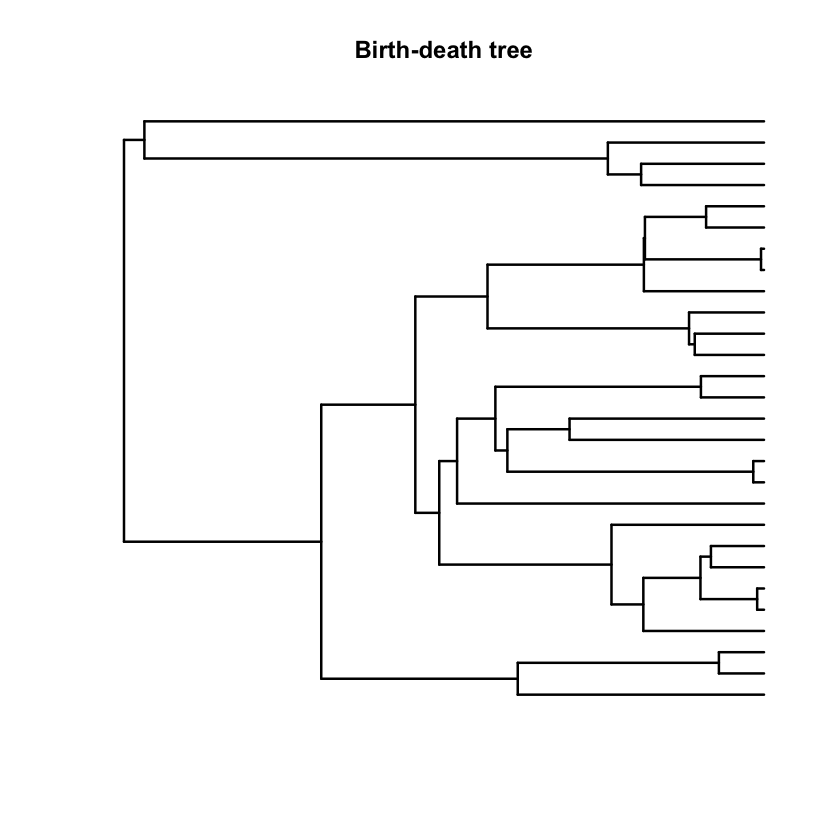

In [8]:
plot(phylo[[1]], show.tip.label = FALSE, cex = 0.5, edge.width = 2, edge.color = "black", main = "Birth-death tree")

In [618]:

age<- max(node.age(phylo[[1]])$age) #age de l'arbre
T <- as.numeric(10^(seq(0, log10(age+1.), length = 300)) - 1) #vecteur de temps

In [638]:
# simulate deterministic HBD model
lamb_list <- rep(lambda, length(T)) #on crée un vecteur de lambda de la même longueur que T
mu_list <- rep(mu, length(T)) #on crée un vecteur de mu de la même longueur que T
simulation = simulate_deterministic_hbd(LTT0  = 65, oldest_age = age, rho0 = 0.8, age_grid = T , lambda = lambda , mu = mu) #simulation du modèle déterministe

In [639]:
write.csv(simulation$LTT, file = '/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/sim_dLTT.csv')
write.csv(simulation$ages, file = '/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/sim_dages.csv')


In [629]:
tree_list <- list()
LTT<- list()
Temps <- list()
branch_t <- list()

In [630]:

for (i in (1:numbsim)) {
  tree <- phylo[[i]]
  tree_list <- append(tree_list, list(tree))
  Nb_lin<-count_lineages_through_time(tree,Ntimes=300 ,ultrametric=TRUE,regular_grid = TRUE)
  LTT <- append(LTT, list(Nb_lin$lineages))
  Temps <- append(Temps, list(Nb_lin$times))
  branch_t <- append(branch_t, list(branching.times(tree)))
}

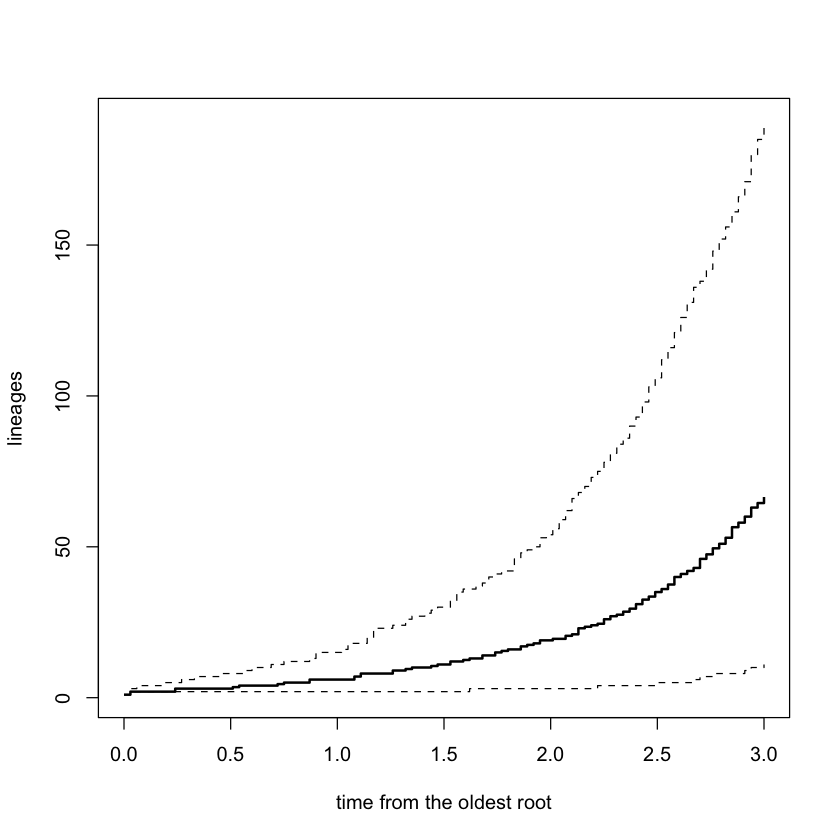

In [631]:
multiphylo <- as.multiPhylo.list(tree_list)
LTT95 <- ltt95(multiphylo)


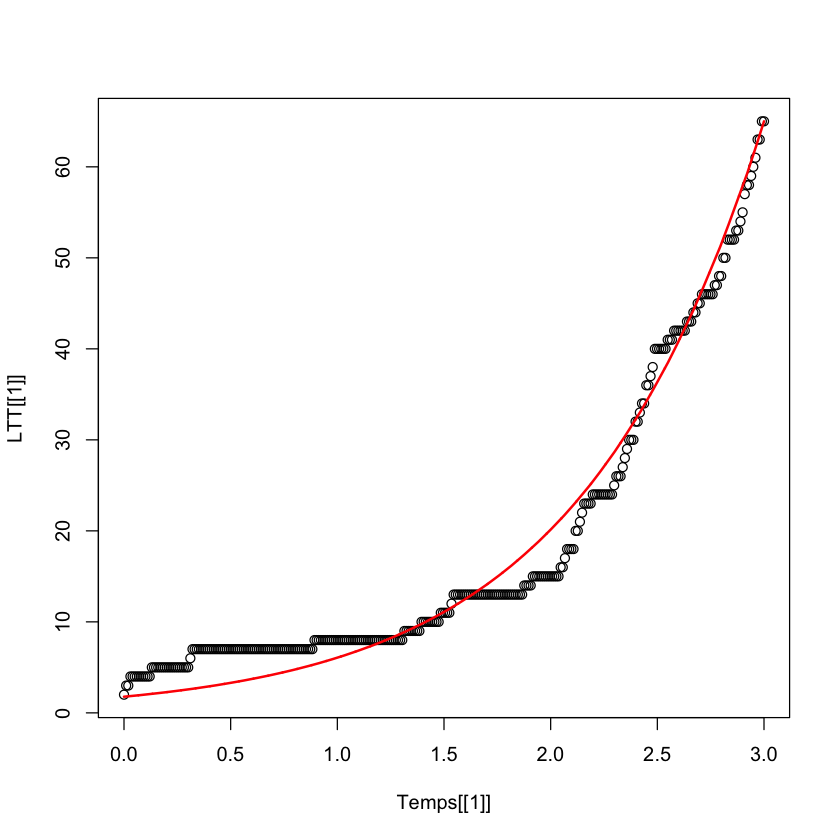

In [632]:

plot(Temps[[1]],LTT[[1]])
points(simulation$ages, rev(simulation$LTT),  type = "l", col = "red", lwd = 2)

In [633]:

write.csv(LTT, file = '/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/sim_LTTs.csv')
write.csv(Temps, file = '/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/sim_temps.csv')
#write.csv(branch_t, file = '/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/sim_branch_times.csv')


In [3]:
#values varying linearly from 0.5 in 0 to 1.5 in 30
birth <- function(t){ 0.4 + 1. * t/11 }

#piecewise constant with one step at time 6
death <- function(t){ ifelse(t < 4, 0.3, 0.9) }
#primitive of death

#vectorized primitive of birth and death 
BIRTH <- function(t){ 0.4 * t + (1/2) * t^2 /11 }
DEATH <- function(t){ ifelse(t < 4, 0.3 * t, 0.3 * 4 + 0.9 * (t - 4)) }


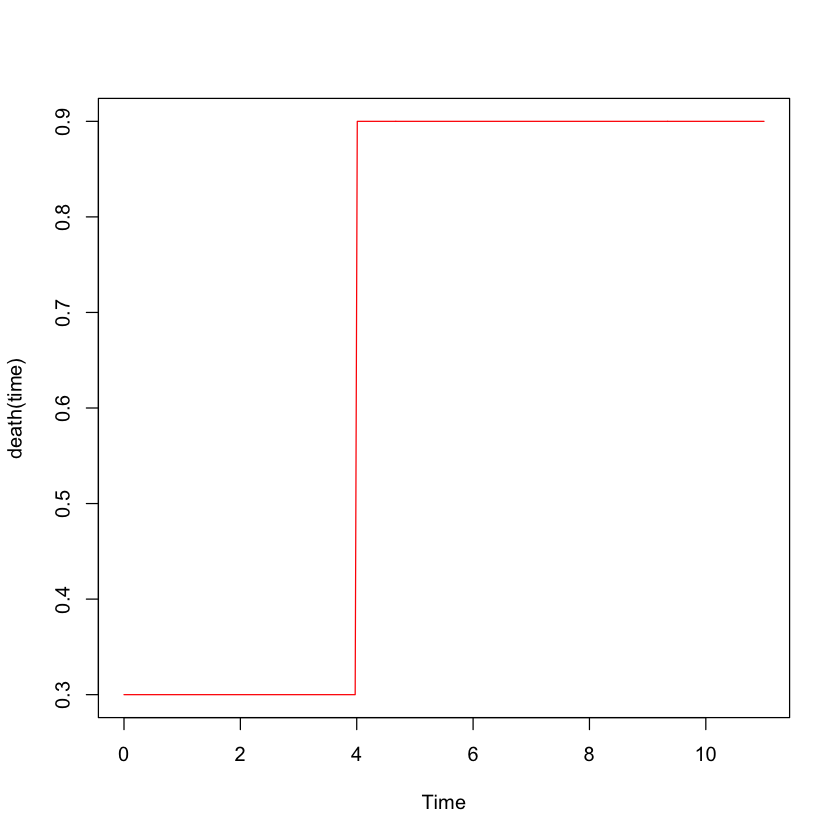

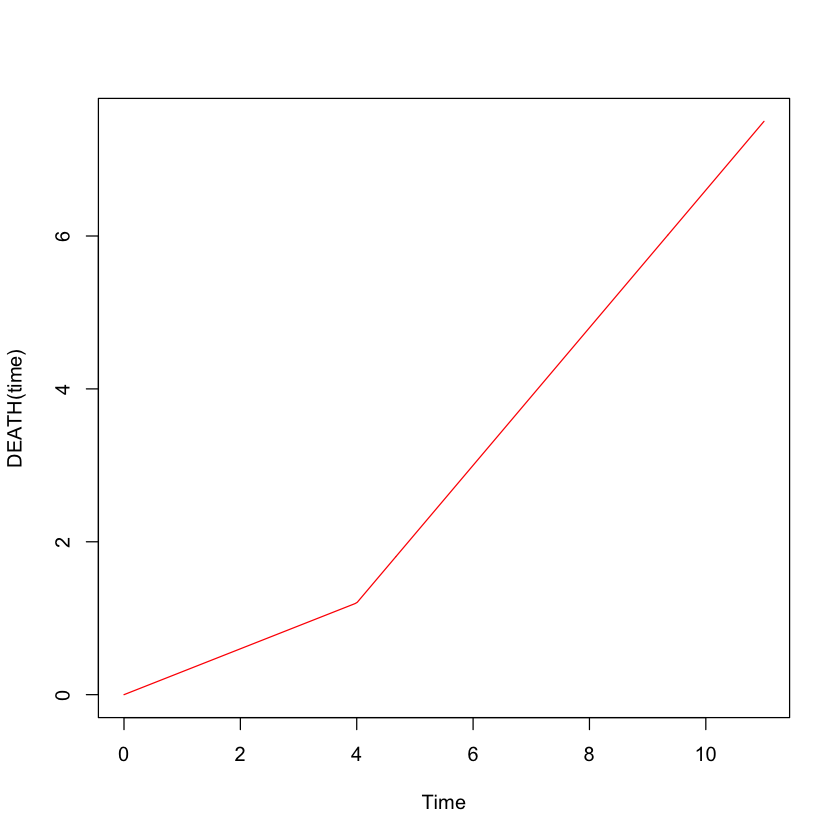

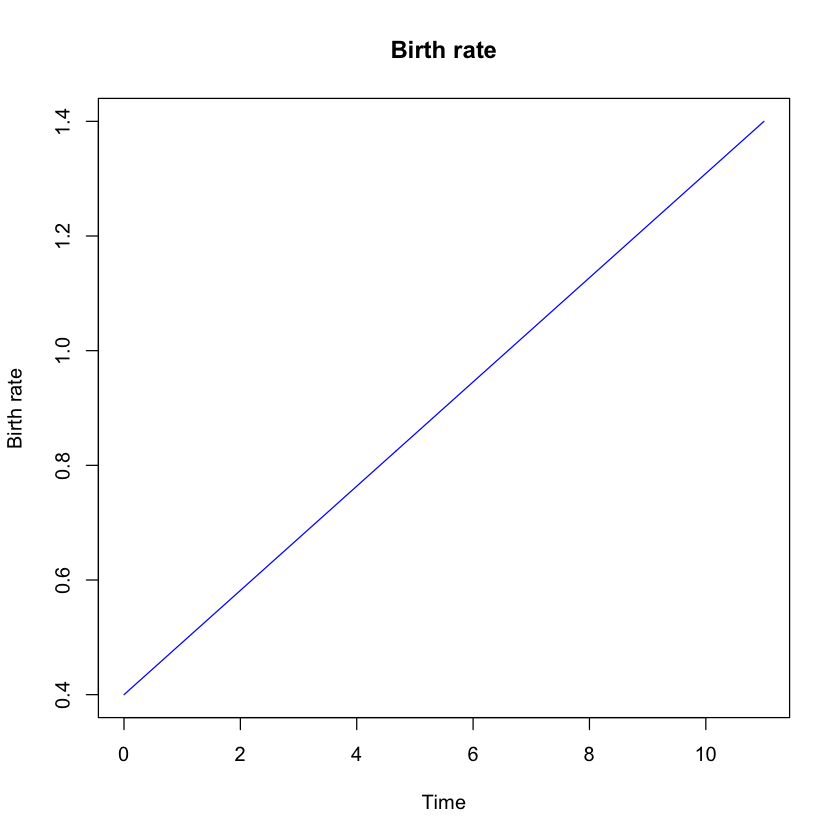

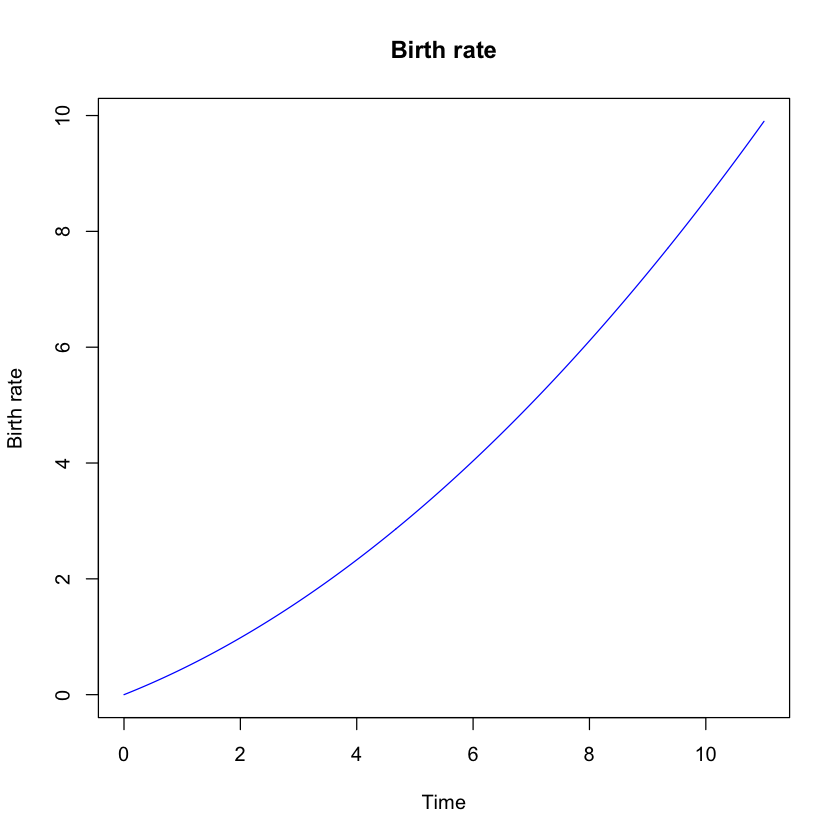

In [4]:
#plot the birth rate for time between 0 and 30 
time <- seq(0, 11, length = 300)
plot(time, death(time), type = "l", xlab = "Time",col="red")
plot(time, DEATH(time), type = "l", xlab = "Time",col="red")

plot(time, birth(time), type = "l", xlab = "Time", ylab = "Birth rate", main = "Birth rate",col='blue')
plot(time, BIRTH(time), type = "l", xlab = "Time", ylab = "Birth rate", main = "Birth rate",col='blue')

In [23]:

tree <- rbdtree(birth, death, Tmax = 11, BIRTH = BIRTH, DEATH = DEATH, eps=1e-6)
drop.fossil(tree, tol = 1e-8)




Phylogenetic tree with 104 tips and 103 internal nodes.

Tip labels:
  t1, t2, t3, t4, t5, t6, ...

Rooted; includes branch lengths.

Jacknife :

In [24]:
phylo <- rbdtree(birth, death, Tmax = 11, BIRTH = BIRTH, DEATH = DEATH, eps=1e-4)
phylo <- drop.fossil(phylo, tol = 1e-8)

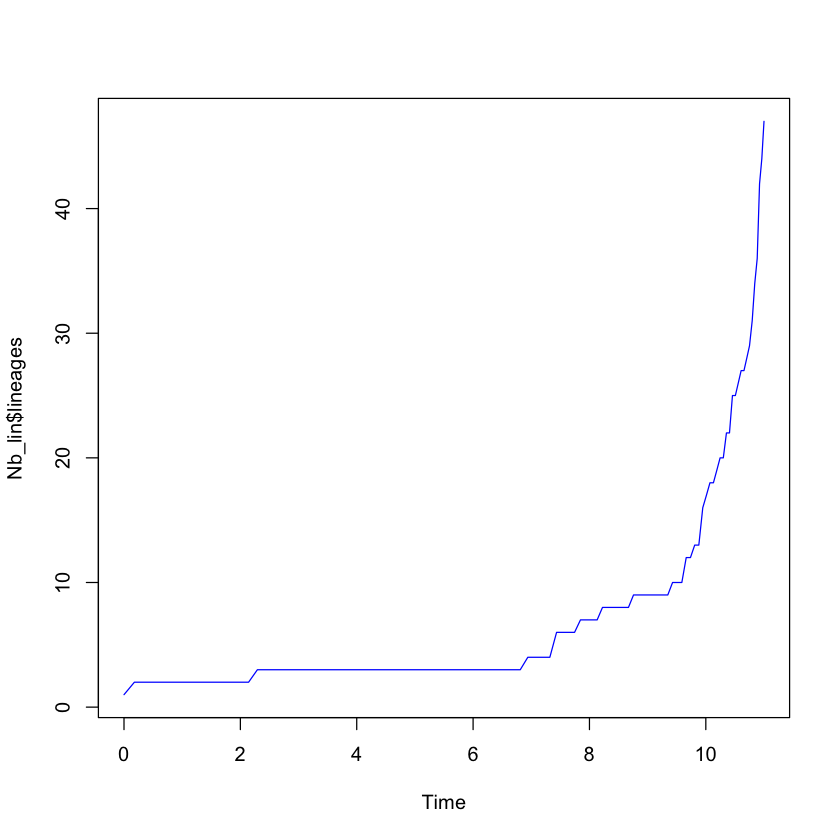

In [25]:
Nb_lin<-count_lineages_through_time(phylo,Ntimes=100 ,ultrametric=TRUE,regular_grid = FALSE)

plot(Nb_lin$times,Nb_lin$lineages, type = "l", xlab = "Time",col='blue')

In [26]:
ntips <- Ntip(phylo)

LTT_jack <-  vector("list", length = ntips)
LTT_times <- vector("list", length = ntips)
tree_list <- vector("list", length = ntips)

Nb_lin <-  count_lineages_through_time(phylo, Ntimes = 100, regular_grid=TRUE)
LTT <- list(Nb_lin$lineages)
LTT_t <- list(Nb_lin$times)

for (i in 1:ntips){
    subtree <- force.ultrametric(drop.tip(phylo, i))
    tree_list[i] <- list(subtree)
    Nb_lin <-  count_lineages_through_time(subtree,Ntimes = 100,regular_grid=TRUE)
    LTT_jack[i] <- list(Nb_lin$lineages)
    LTT_times[i] <- list(Nb_lin$times)
}

***************************************************************
*                          Note:                              *
*    force.ultrametric does not include a formal method to    *
*    ultrametricize a tree & should only be used to coerce    *
*   a phylogeny that fails is.ultramtric due to rounding --   *
*    not as a substitute for formal rate-smoothing methods.   *
***************************************************************
***************************************************************
*                          Note:                              *
*    force.ultrametric does not include a formal method to    *
*    ultrametricize a tree & should only be used to coerce    *
*   a phylogeny that fails is.ultramtric due to rounding --   *
*    not as a substitute for formal rate-smoothing methods.   *
***************************************************************
***************************************************************
*                          Note:        

In [27]:
write.csv(LTT,"/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/jacknife/LTT_sim.csv",row.names = FALSE)
write.csv(LTT_t,"/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/jacknife/Time_sim.csv",row.names = FALSE)

write.csv(LTT_jack,"/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/jacknife/LTT_jack.csv",row.names = FALSE)
write.csv(LTT_times,"/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/jacknife/Time_jack.csv",row.names = FALSE)

In [6]:
cpm_tree <- rbdtree(birth, death, Tmax = 7, BIRTH = BIRTH, DEATH = DEATH, eps=1e-4)
cpm_tree <- drop.fossil(cpm_tree, tol = 1e-8)


In [49]:
tree_list <- list()
LTT<- list()
Temps <- list()
branch_t <- list()
frac <- list()
f <- 0.8
numbsim <- 100


for (i in (1:numbsim)){
    cpm_tree <- rbdtree(birth, death, Tmax = 8, BIRTH = BIRTH, DEATH = DEATH, eps=1e-4)
    cpm_tree <- drop.fossil(cpm_tree, tol = 1e-8)
    cpm_subtree <- keep.tip(cpm_tree, sample(cpm_tree$tip.label, ceiling(f*Ntip(cpm_tree))))
    tree_list <- append(tree_list, list(cpm_subtree))
    Nb_lin<-count_lineages_through_time(cpm_subtree ,Ntimes=150 ,ultrametric=TRUE, regular_grid = TRUE)
    LTT <- append(LTT, list(Nb_lin$lineages))
    Temps <- append(Temps, list(Nb_lin$times))
    branch_t <- append(branch_t, list(branching.times(tree)))
    frac <- append(frac, list(Ntip(cpm_subtree)/Ntip(cpm_tree)))
}


In [51]:
write.csv(frac, file = '/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/cpm_simulation/cpm_frac.csv')
write.csv(LTT, file = '/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/cpm_simulation/cpm_LTTs.csv')
write.csv(Temps, file = '/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/cpm_simulation/cpm_sim_temps.csv')
write.csv(branch_t, file = '/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/cpm_simulation/cpm_sim_branch_times.csv')



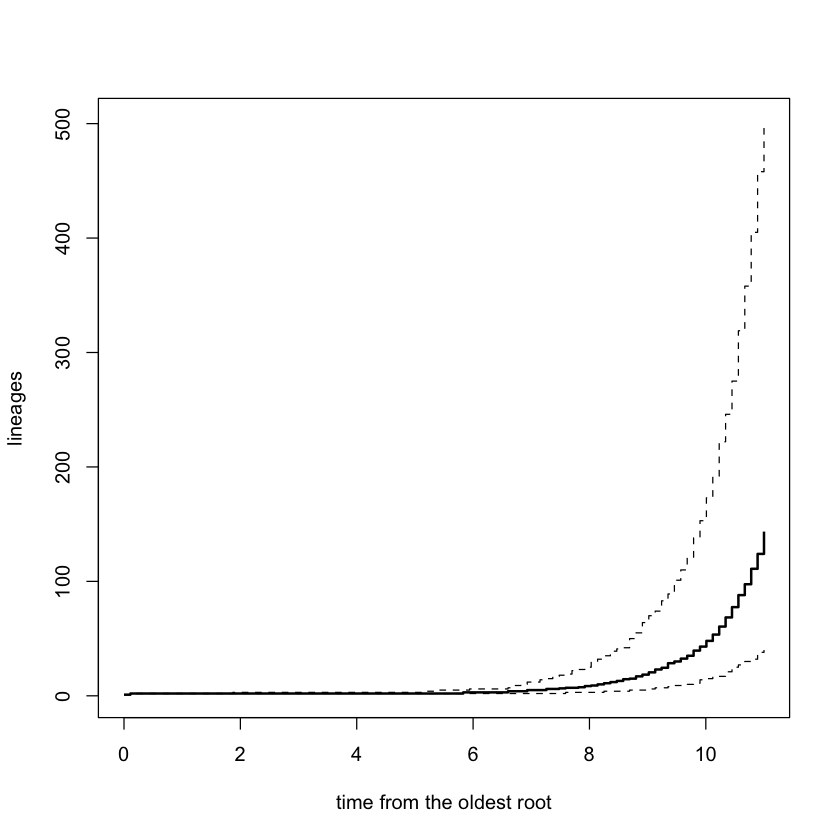

In [17]:
multiphylo <- as.multiPhylo.list(tree_list)
LTT95 <- ltt95(multiphylo)